In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import imblearn
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [2]:
df = pd.read_csv('final_combined_dataset.csv')

In [3]:
df = df.rename(columns = {'Unnamed: 0':'ID'})

In [4]:
xfeatures=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x','G1.x','G3.x']

In [5]:
yfeatures = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet','guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y','G1.y','G3.y']

In [6]:
keepcol = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']

In [7]:
fildf = df.loc[:,keepcol]

In [8]:
fildf_x = fildf.loc[:,xfeatures]

In [9]:
fildf_y = fildf.loc[:,yfeatures]

In [10]:
def convertmarks(mark):
    if mark<10:
        return 'B'
    else:
        return 'A'

In [11]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [12]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [13]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [14]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [17]:
fildf_x = fildf_x.sample(frac=1,random_state=123)
fildf_y = fildf_y.sample(frac=1,random_state=123)

In [18]:
fildf_x['New G1'].value_counts()

0    665
1    217
Name: New G1, dtype: int64

In [19]:
fildf_x['New G3'].value_counts()

0    606
1    276
Name: New G3, dtype: int64

In [20]:
max_size = fildf_x['New G1'].value_counts().max()

In [21]:
lst = [fildf_x]
for class_index, group in fildf_x.groupby('New G1'):
    lst.append(group.sample(max_size-len(group), replace=True))
fildf_x_G1 = pd.concat(lst)

In [22]:
fildf_x_G1['New G1'].value_counts()

1    665
0    665
Name: New G1, dtype: int64

In [23]:
max_size = fildf_y['New G1'].value_counts().max()

In [24]:
lst = [fildf_y]
for class_index, group in fildf_y.groupby('New G1'):
    lst.append(group.sample(max_size-len(group), replace=True))
fildf_y_G1 = pd.concat(lst)

In [25]:
fildf_y_G1['New G1'].value_counts()

1    813
0    813
Name: New G1, dtype: int64

In [26]:
max_size = fildf_x['New G3'].value_counts().max()

In [27]:
lst = [fildf_x]
for class_index, group in fildf_x.groupby('New G3'):
    lst.append(group.sample(max_size-len(group), replace=True))
fildf_x_G3 = pd.concat(lst)

In [28]:
fildf_x_G3['New G3'].value_counts()

1    606
0    606
Name: New G3, dtype: int64

In [29]:
max_size = fildf_y['New G3'].value_counts().max()

In [30]:
lst = [fildf_y]
for class_index, group in fildf_y.groupby('New G3'):
    lst.append(group.sample(max_size-len(group), replace=True))
fildf_y_G3 = pd.concat(lst)

In [31]:
fildf_y_G3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.y',
       'traveltime.y', 'studytime.y', 'failures.y', 'schoolsup.y', 'famsup.y',
       'paid.y', 'activities.y', 'higher.y', 'romantic.y', 'famrel.y',
       'freetime.y', 'goout.y', 'Dalc.y', 'Walc.y', 'health.y', 'absences.y',
       'G1.y', 'G3.y', 'New G1', 'New G3'],
      dtype='object')

In [32]:
fildf_x_G1 = fildf_x_G1.drop(['G1.x','G3.x'],axis=1)
fildf_y_G1 = fildf_y_G1.drop(['G1.y','G3.y'],axis=1)
fildf_x_G3 = fildf_x_G3.drop(['G1.x','G3.x'],axis=1)
fildf_y_G3 = fildf_y_G3.drop(['G1.y','G3.y'],axis=1)

In [33]:
features_x_G3 = fildf_x_G3.drop(['New G1','New G3'],axis=1)
features_x_G1 = fildf_x_G1.drop(['New G1','New G3'],axis=1)
features_y_G3 = fildf_y_G3.drop(['New G1','New G3'],axis=1)
features_y_G1 = fildf_y_G1.drop(['New G1','New G3'],axis=1)

In [34]:
target_x_G3 = fildf_x_G3['New G3']
target_x_G1 = fildf_x_G1['New G1']
target_y_G3 = fildf_y_G3['New G3']
target_y_G1 = fildf_y_G1['New G1']

In [35]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=0)
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=0)

In [36]:
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=0)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=0)

### Gaussian Naive Bayes

In [37]:
clf = GaussianNB()

In [38]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= clf.predict(X_test_x_G1)
y_pred_x_G1_Prob = clf.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       198
           1       0.67      0.89      0.76       135

    accuracy                           0.78       333
   macro avg       0.79      0.80      0.78       333
weighted avg       0.81      0.78      0.78       333

Kappa Score: 0.5617797695262484


In [39]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
y_pred_x_G3_Prob = clf.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       170
           1       0.75      0.90      0.82       133

    accuracy                           0.83       303
   macro avg       0.83      0.84      0.83       303
weighted avg       0.84      0.83      0.83       303

Kappa Score: 0.6588281148499415


In [40]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)

print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       220
           1       0.81      0.87      0.84       187

    accuracy                           0.85       407
   macro avg       0.84      0.85      0.84       407
weighted avg       0.85      0.85      0.85       407

Kappa Score: 0.6902325581395349


In [41]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       195
           1       0.94      0.87      0.91       223

    accuracy                           0.90       418
   macro avg       0.90      0.91      0.90       418
weighted avg       0.91      0.90      0.90       418

Kappa Score: 0.8087350431261296


### Decision Tree

In [42]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       127
           1       0.98      0.85      0.91       206

    accuracy                           0.90       333
   macro avg       0.89      0.92      0.90       333
weighted avg       0.92      0.90      0.90       333

Kappa Score: 0.7982077602512074
	
Feature failures.x and its importance is 0.3837055539956649
Feature goout.x and its importance is 0.07608423425447004
Feature freetime.x and its importance is 0.046051687067964406
Feature reason and its importance is 0.04269117149080293
Feature Fedu and its importance is 0.04238031511778837
Feature absences.x and its importance is 0.039844192733868
Feature Walc.x and its importance is 0.039670115679763536
Feature age and its importance is 0.03951375547179002
Feature Fjob and its importance is 0.03775822303085799
Feature traveltime.x and its importance is 0.027151049734857872
Feature famrel.x and its importance is 0.0246433264048066

([<matplotlib.axis.XTick at 0x7fd9eadc5e10>,
 <a list of 30 Text xticklabel objects>)

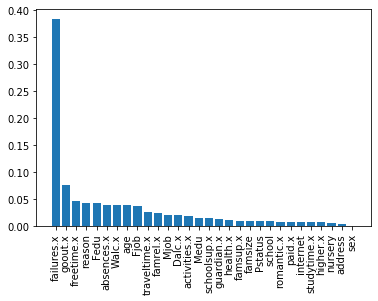

In [43]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= dtc.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       134
           1       0.93      0.88      0.90       169

    accuracy                           0.89       303
   macro avg       0.89      0.90      0.89       303
weighted avg       0.90      0.89      0.89       303

Kappa Score: 0.7875640857105297
	
Feature failures.x and its importance is 0.2585074184284936
Feature schoolsup.x and its importance is 0.1821829826422887
Feature absences.x and its importance is 0.06665576179369676
Feature Medu and its importance is 0.0578644437472527
Feature health.x and its importance is 0.04494982271535529
Feature famrel.x and its importance is 0.0412857450009101
Feature goout.x and its importance is 0.03945282554287828
Feature Mjob and its importance is 0.03104293457597013
Feature studytime.x and its importance is 0.029500616216224438
Feature sex and its importance is 0.02660429031264171
Feature guardian.x and its importance is 0.0258061880849

([<matplotlib.axis.XTick at 0x7fd9eb26a350>,
 <a list of 30 Text xticklabel objects>)

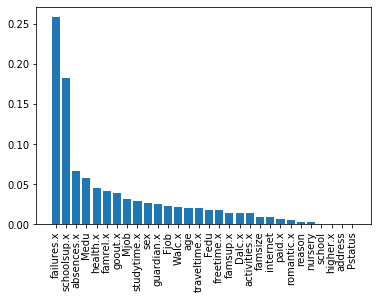

In [44]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       195
           1       1.00      0.95      0.98       212

    accuracy                           0.98       407
   macro avg       0.98      0.98      0.98       407
weighted avg       0.98      0.98      0.98       407

Kappa Score: 0.9508750754375377
	
Feature higher.y and its importance is 0.13118173044354328
Feature failures.y and its importance is 0.11732481177773454
Feature absences.y and its importance is 0.08261494867860696
Feature schoolsup.y and its importance is 0.07466223350363191
Feature Walc.y and its importance is 0.07350240848687524
Feature address and its importance is 0.05873695649003914
Feature school and its importance is 0.049651777050701375
Feature Dalc.y and its importance is 0.049616959669320046
Feature goout.y and its importance is 0.0454570572539866
Feature Fjob and its importance is 0.038688119896628306
Feature Fedu and its importance is 0.032676875259668

([<matplotlib.axis.XTick at 0x7fd9eb3ad550>,
 <a list of 30 Text xticklabel objects>)

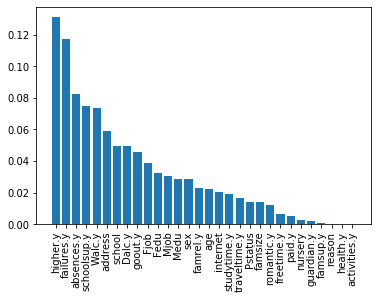

In [45]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       205
           1       1.00      0.97      0.99       213

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418

Kappa Score: 0.9712971228455676
	
Feature goout.y and its importance is 0.15238298922299845
Feature school and its importance is 0.13087092415434887
Feature higher.y and its importance is 0.1110744518110141
Feature absences.y and its importance is 0.07262541945702289
Feature sex and its importance is 0.07224349146110054
Feature age and its importance is 0.06218191212013232
Feature studytime.y and its importance is 0.04860490648129095
Feature schoolsup.y and its importance is 0.045661321123470135
Feature Mjob and its importance is 0.037696660489189286
Feature famsize and its importance is 0.031606611196681254
Feature romantic.y and its importance is 0.03063737075984

([<matplotlib.axis.XTick at 0x7fd9cb5844d0>,
 <a list of 30 Text xticklabel objects>)

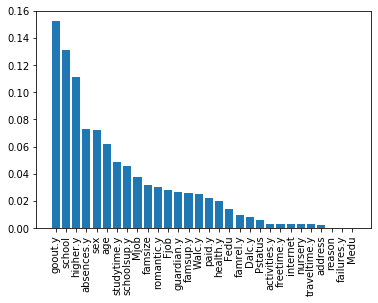

In [46]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Random Forest Classifier

In [47]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.99      0.97      0.98       182

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333

Kappa Score: 0.9576620593203408
	
Feature failures.x and its importance is 0.2687748162913512
Feature absences.x and its importance is 0.056637402925290785
Feature Fedu and its importance is 0.042063169406985755
Feature age and its importance is 0.041250458894310296
Feature Mjob and its importance is 0.041198198916761415
Feature Walc.x and its importance is 0.038405569375479134
Feature Fjob and its importance is 0.036250379083208405
Feature goout.x and its importance is 0.036248702822119394
Feature studytime.x and its importance is 0.03597205711362904
Feature Medu and its importance is 0.034810282846464834
Feature health.x and its importance is 0.03365244670049846


([<matplotlib.axis.XTick at 0x7fd9cb75c350>,
 <a list of 30 Text xticklabel objects>)

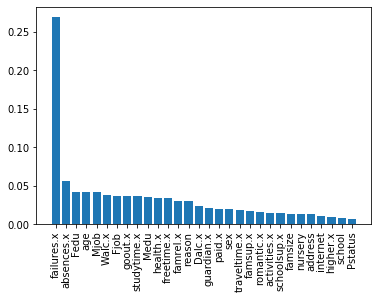

In [48]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= rf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       146
           1       0.94      0.96      0.95       157

    accuracy                           0.95       303
   macro avg       0.95      0.95      0.95       303
weighted avg       0.95      0.95      0.95       303

Kappa Score: 0.8941992929160665
	
Feature failures.x and its importance is 0.21232276623508656
Feature schoolsup.x and its importance is 0.10424298042529888
Feature absences.x and its importance is 0.06378207582320662
Feature goout.x and its importance is 0.04275521703791475
Feature freetime.x and its importance is 0.03868605791715744
Feature Mjob and its importance is 0.03866056952164425
Feature Fedu and its importance is 0.03738579757688607
Feature age and its importance is 0.03635481149292108
Feature Walc.x and its importance is 0.0361930718064125
Feature Medu and its importance is 0.034563379232363835
Feature health.x and its importance is 0.03379316408274699
F

([<matplotlib.axis.XTick at 0x7fd9cc12b6d0>,
 <a list of 30 Text xticklabel objects>)

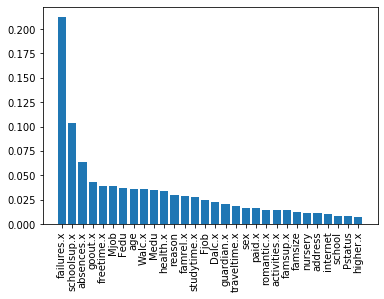

In [49]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       202

    accuracy                           1.00       407
   macro avg       1.00      1.00      1.00       407
weighted avg       1.00      1.00      1.00       407

Kappa Score: 1.0
	
Feature studytime.y and its importance is 0.0801834632173126
Feature higher.y and its importance is 0.06485908305879964
Feature failures.y and its importance is 0.060328729809999385
Feature absences.y and its importance is 0.05969162497826289
Feature Medu and its importance is 0.054631074186467427
Feature schoolsup.y and its importance is 0.045963188762952974
Feature Dalc.y and its importance is 0.043720523658786106
Feature Mjob and its importance is 0.04180410288030466
Feature age and its importance is 0.037197467155941175
Feature health.y and its importance is 0.03675778093056127
Feature Walc.y and its importance is 0.03661531130517649
Feature 

([<matplotlib.axis.XTick at 0x7fd9cc2e60d0>,
 <a list of 30 Text xticklabel objects>)

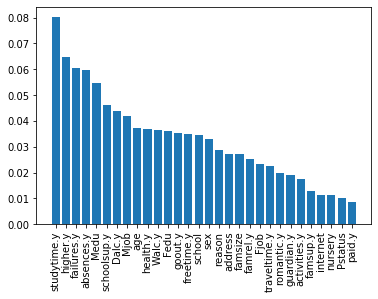

In [50]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       207

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

Kappa Score: 1.0
	
Feature school and its importance is 0.08294862788133187
Feature Dalc.y and its importance is 0.06404151941834663
Feature goout.y and its importance is 0.06156183760014206
Feature higher.y and its importance is 0.05395449103601632
Feature absences.y and its importance is 0.04977722144117094
Feature studytime.y and its importance is 0.04950212705092043
Feature failures.y and its importance is 0.04835401666871081
Feature Medu and its importance is 0.046310571010963225
Feature schoolsup.y and its importance is 0.04072566556905133
Feature sex and its importance is 0.04051731650646728
Feature Fedu and its importance is 0.03736251005996678
Feature free

([<matplotlib.axis.XTick at 0x7fd9cc4a5610>,
 <a list of 30 Text xticklabel objects>)

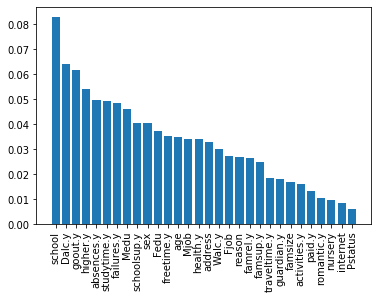

In [51]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Linear SVM

In [52]:
lsvm = LinearSVC(max_iter=1000000)

In [53]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lsvm.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       194
           1       0.70      0.91      0.79       139

    accuracy                           0.80       333
   macro avg       0.81      0.82      0.80       333
weighted avg       0.83      0.80      0.80       333

Kappa Score: 0.6084586332216917


In [54]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       177
           1       0.74      0.94      0.83       126

    accuracy                           0.84       303
   macro avg       0.84      0.85      0.84       303
weighted avg       0.86      0.84      0.84       303

Kappa Score: 0.6792403914706073


In [55]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       209
           1       0.84      0.86      0.85       198

    accuracy                           0.85       407
   macro avg       0.85      0.85      0.85       407
weighted avg       0.85      0.85      0.85       407

Kappa Score: 0.7051009564293305


In [56]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       205
           1       0.94      0.92      0.93       213

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418

Kappa Score: 0.8564856142278376


### Logistic Regression

In [57]:
lg = LogisticRegression(random_state=0,max_iter=1000000)

In [58]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lg.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       192
           1       0.71      0.90      0.79       141

    accuracy                           0.80       333
   macro avg       0.81      0.81      0.80       333
weighted avg       0.82      0.80      0.80       333

Kappa Score: 0.6081095538675511


In [59]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       175
           1       0.75      0.93      0.83       128

    accuracy                           0.84       303
   macro avg       0.84      0.85      0.84       303
weighted avg       0.86      0.84      0.84       303

Kappa Score: 0.6790323626694338


In [60]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       206
           1       0.84      0.85      0.84       201

    accuracy                           0.85       407
   macro avg       0.85      0.85      0.85       407
weighted avg       0.85      0.85      0.85       407

Kappa Score: 0.6903896542980306


In [61]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       208
           1       0.94      0.93      0.94       210

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

Kappa Score: 0.8708193118604491


### Gradient Boosting

In [62]:
gb = GradientBoostingClassifier(random_state=0)

In [63]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= gb.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       167
           1       0.84      0.90      0.87       166

    accuracy                           0.86       333
   macro avg       0.87      0.86      0.86       333
weighted avg       0.87      0.86      0.86       333

Kappa Score: 0.7297906486106353


In [64]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       158
           1       0.84      0.92      0.88       145

    accuracy                           0.88       303
   macro avg       0.88      0.88      0.88       303
weighted avg       0.88      0.88      0.88       303

Kappa Score: 0.7628798747880527


In [65]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       195
           1       0.99      0.94      0.97       212

    accuracy                           0.97       407
   macro avg       0.97      0.97      0.97       407
weighted avg       0.97      0.97      0.97       407

Kappa Score: 0.9312251056125528


In [66]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       206
           1       1.00      0.98      0.99       212

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418

Kappa Score: 0.976079840684872
